![lop](../../images/logo_diive1_128px.png)

<span style='font-size:32px; display:block;'>
<b>
    Measurement offset correction¶
</b>
</span>

---
**Notebook version**: `1` (22 Sep 2024)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)  

</br>

# **Background**

- Calculate the constant offset between two time series (measurement and replicate)
- Then correct measurement by found offset

</br>

# **Imports**

In [1]:
import importlib.metadata
import warnings
from datetime import datetime

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from diive.core.plotting.heatmap_datetime import HeatmapDateTime
from diive.pkgs.corrections.offsetcorrection import MeasurementOffsetFromReplicate

np.random.seed(42)
warnings.filterwarnings('ignore')
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.85.0


</br>

# **Docstring**

In [2]:
# help(WindDirOffset)

</br>

# **Create example data**
- Create 1000 records of random numbers in 10min time resolution as `replicate`
- Then add a constant offset of `4.2` to data and store as `measurement`

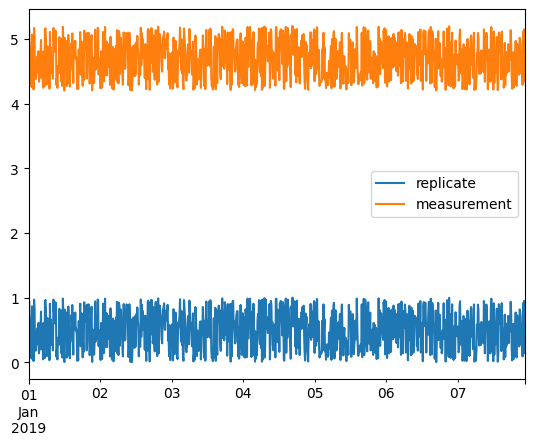

In [3]:
rng = pd.date_range('2019-01-01', freq='10min', periods=1000)
replicate = pd.Series(np.random.rand(1000), name='replicate', index=rng)
measurement = replicate.copy()
measurement = measurement.add(4.2)
measurement.name = 'measurement'
replicate.plot(label='replicate')
measurement.plot(label='measurement')
plt.legend()


</br>

# **Calculate constant offset** between `measurement`  and `replicate`

In [4]:
off = MeasurementOffsetFromReplicate(
    measurement=measurement,
    replicate=replicate,
    offset_start=-10,
    offset_end=10,
    offset_stepsize=.1
)

#1   trying with offset: -10.0   found absolute difference: 5799.999999999998
#2   trying with offset: -9.9   found absolute difference: 5700.000000000002
#3   trying with offset: -9.8   found absolute difference: 5600.0
#4   trying with offset: -9.7   found absolute difference: 5500.0
#5   trying with offset: -9.6   found absolute difference: 5400.000000000002
#6   trying with offset: -9.5   found absolute difference: 5300.000000000002
#7   trying with offset: -9.4   found absolute difference: 5200.000000000002
#8   trying with offset: -9.3   found absolute difference: 5100.000000000003
#9   trying with offset: -9.2   found absolute difference: 5000.000000000002
#10   trying with offset: -9.1   found absolute difference: 4900.000000000004
#11   trying with offset: -9.0   found absolute difference: 4800.000000000003
#12   trying with offset: -8.9   found absolute difference: 4700.000000000004
#13   trying with offset: -8.8   found absolute difference: 4600.000000000004
#14   trying wit

# **Results**

In [5]:
corrected = off.get_corrected_measurement()
offset = off.get_offset()
print(f"The offset with minimum absolute difference between data points is {offset}")

The offset with minimum absolute difference between data points is -4.200000000000021


## Plot before / after offset correction

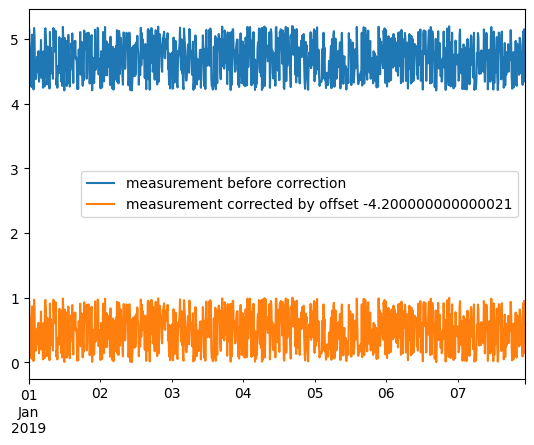

In [6]:
measurement.plot(label=f'measurement before correction')
corrected.plot(label=f'measurement corrected by offset {offset}')
plt.legend();

</br>

# End of notebook

In [7]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2025-01-23 12:45:48
